# VR vs Real World plotting script

This code was developed and written by Jasmin L. Walter

In [ ]:
%reset

## Import

In [15]:
# import copy  # copy big/deep objects by value
# import csv
# import datetime  # datetime operations
# import itertools  # operate with iterators
# import json  # read/write from/into json format
# import math
import os  # OS operations (read/write files/folders)
# import sys
# import time
# import warnings  # hide warnings
# from collections import Counter
# from itertools import groupby
# import matplotlib

# # process parallelization
# from multiprocessing import Manager, Pool, RawArray, cpu_count
# from os.path import exists

# import matplotlib.pyplot as plt  # mother of plots focr Python

# # import mlxtend
# import numpy as np  # array/matrix operations (e.g. linear algebra)
# import pandas as pd  # operate with dataframes

# import scipy.stats
# import seaborn as sns  # matplotlib plotting nice with shortcuts
# from IPython.display import Markdown, display  # print nicely
# from ipywidgets import IntProgress
# #from matplotlib.pyplot import cm
# from scipy.signal import savgol_coeffs
# from tqdm.notebook import tqdm, trange  # mother of progressbars
# from scipy.stats import ks_2samp
# from multiprocessing import Pool, cpu_count

# import scipy.signal

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.cm import get_cmap

In [12]:
savepath = "F:/Cyprus_project_overview/data/analysis/exploration/VRvsRealWorld"


datapathRW = "F:/Cyprus_project_overview/data/analysis/exploration/VRvsRealWorld"
datapathVR = "F:/WestbrookProject/HumanA_Data/Experiment1/Exploration_short/analysis"


In [58]:
dataRW = pd.read_csv(os.path.join(datapathRW, "overviewGraphMeasures_Cyprus.csv"))

dataRW.head()


,nrViewedHouses,nrEdges,density,diameter,avgShortestPath
0,535,1618,0.011327,18,7.273397


In [59]:
dataVR = pd.read_csv(os.path.join(datapathVR, "overviewGraphMeasures.csv"))


dataVR.head()

,Participants,nrViewedHouses,nrEdges,density,diameter,avgShortestPath
0,365,236,2033,0.073314,6,2.674016
1,1754,240,2311,0.080579,6,2.648785
2,2258,240,2669,0.093061,5,2.487083
3,2693,240,2877,0.100314,5,2.340937
4,3310,240,2054,0.071618,6,2.764132


['nrNodes', 'nrEdges', 'density', 'diameter', 'avgShortestPath']


C:\Users\jasmi\AppData\Local\Temp\ipykernel_30580\1299347300.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  parula = get_cmap("viridis")


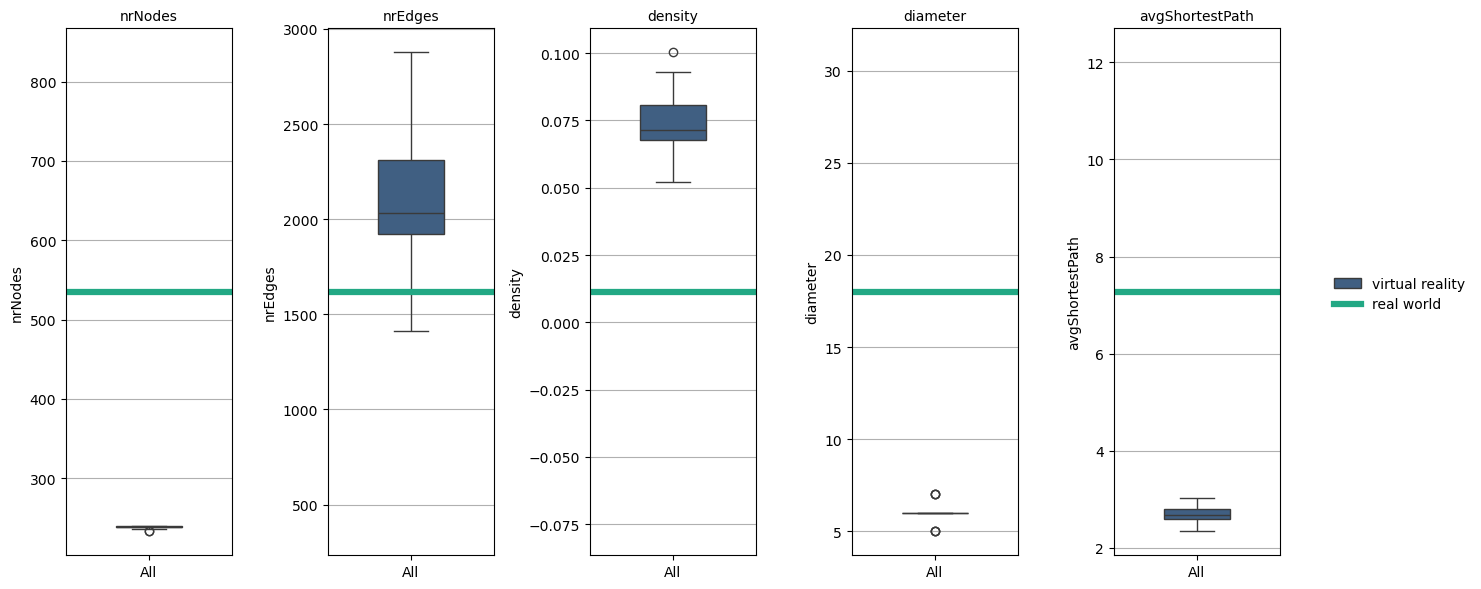

In [73]:
# Exclude non-numeric or unwanted columns (e.g. 'Participant')

dataVR = dataVR.rename(columns={"nrViewedHouses": "nrNodes"})
dataRW = dataRW.rename(columns={"nrViewedHouses": "nrNodes"})

columns_to_plot = [col for col in dataRW.columns 
                   if col in dataVR.columns and 
                   col != 'Participant' and 
                   pd.api.types.is_numeric_dtype(dataVR[col])]
print(columns_to_plot)
# Pull single participant row
row = dataRW.iloc[0]

# Subplot layout
n_vars = len(columns_to_plot)
ncols = 5
nrows = 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13,6))
axes = axes.flatten()

# Parula-like colors
parula = get_cmap("viridis")
box_color = parula(0.3)
line_color = parula(0.6)

for idx, col in enumerate(columns_to_plot):
    ax = axes[idx]
    
    # Extract VR values for this variable
    values = dataVR[col].dropna()
    real_val = row[col]
    
    # Boxplot with dummy x category
    sns.boxplot(data=values.to_frame().assign(Group="All"), x="Group", y=col, ax=ax, color=box_color, width=0.4, label='virtual reality')
    
    # Draw real-world line
    ax.axhline(y=real_val, color=line_color, linestyle='-', linewidth=4.5, label='real world')

    # Center real-world value in y-axis:
    max_above = (values.max() - real_val)
    max_below = (real_val - values.min())
    max_range = max(max_above, max_below)
    ax.set_ylim(real_val - max_range * 1.1, real_val + max_range * 1.1)

    # Formatting
    ax.set_xlabel("")
    ax.set_title(col, fontsize=10)
    ax.grid(True, axis='y')

    # Only add legend to the last axis
    # if idx == len(columns_to_plot) - 1:
    #     handles, labels = ax.get_legend_handles_labels()
    # else:
    ax.legend_.remove() if ax.get_legend() else None  # Remove if exists


# Remove unused axes
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

# # Add one legend outside the rightmost subplot
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)
# # plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave space on the right for the legend
# plt.tight_layout(rect=[0, 0, 0.95, 1])

# plt.savefig(os.path.join(savepath, 'graphMeasures_VRvsRW.png'), dpi=300)


# Add shared legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

# Tidy up layout with margin on the right for legend
plt.tight_layout(rect=[0, 0, 0.95, 1])

# Save without overlap
fig.savefig(os.path.join(savepath, 'graphMeasures_VRvsRW.png'), dpi=300, bbox_inches='tight', pad_inches=0.1)


plt.tight_layout()
plt.show()

